Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
Anda diperbolehkan melakukan eksplorasi terhadap,
Metode pra pengolahan
Pemilihan fitur
Arsitektur ANN
Fungsi Aktiviasi
ANN diimplementasikan dengan menggunakan tensorflow.
DIKERJAKAN SECARA BERKELOMPOK
JELASKAN HASIL YANG ANDA DAPATKAN,
AKURASI
CONFUSION MATRIX
KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [11]:
# Load data MNIST dan split data menjadi data train dan data test
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print(len(X_train))
print(len(X_test))

60000
10000


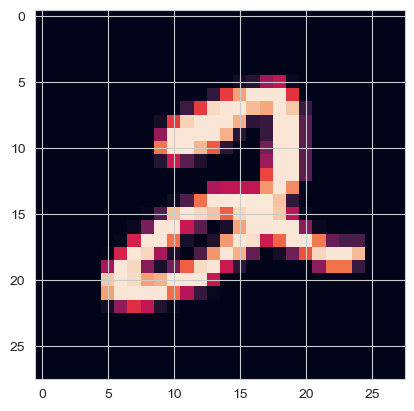

In [12]:
# menampilkan data gambar index ke 5
plt.imshow(X_train[5])
plt.show()

In [13]:
# Mengambil panjang vektor fitur
feature_vector_length = 784

# Mereshape data train dan test menjadi bentuk (jumlah sampel, panjang vektor fitur)
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Menyimpan panjang vektor fitur ke variabel `input_shape`
input_shape = (feature_vector_length,)

# Mencetak bentuk data train
X_train.shape



(60000, 784)

In [14]:
# Membuat model Sequential
model = Sequential()

# Menambahkan layer Dense pertama dengan 350 neuron dan aktivasi relu
model.add(Dense(350, input_shape=input_shape, activation='relu'))

# Menambahkan layer Dense kedua dengan 50 neuron dan aktivasi relu
model.add(Dense(50, activation='relu'))

# Menambahkan layer Dense ketiga dengan 10 neuron dan aktivasi softmax
model.add(Dense(10, activation='softmax'))

In [15]:
# melakukan compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
# Melakukan training model dengan 10 epochs
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.3458 - accuracy: 0.7311
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4860 - accuracy: 0.8859
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2821 - accuracy: 0.9351
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2004 - accuracy: 0.9521
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1542 - accuracy: 0.9613
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1223 - accuracy: 0.9698
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1102 - accuracy: 0.9727
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0947 - accuracy: 0.9760
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0854 - accuracy: 0.9795
Epoch 10/10
1875/1875 [==============================] - 25s 13ms/s

In [17]:
# evaluate model
test_results=model.evaluate(X_test,y_test)

# melakukan prediksi data test dengan model yang telah dilatih
y_predicted=model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [18]:
from sklearn.metrics import accuracy_score

# Mendapatkan label prediksi
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Membuat confusion matrix menggunakan tensor TensorFlow
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

# Mencetak confusion matrix
print(cm)

# Menghitung akurasi prediksi menggunakan fungsi accuracy_score()
accuracy = accuracy_score(y_test, y_predicted_labels)

# Mencetak akurasi prediksi
print(accuracy)

tf.Tensor(
[[ 966    0    0    0    0    0    1    3    7    3]
 [   0 1117    1    1    0    0    0    0   16    0]
 [   4    1 1012    0    1    0    0    2   10    2]
 [   0    0   11  961    0   13    0    1   15    9]
 [   0    3    5    0  941    0    4    0   10   19]
 [   2    0    0    3    0  872    2    1    4    8]
 [   4    2    0    0    1   10  931    1    9    0]
 [   0    3   18   21    1    0    0  927   22   36]
 [   3    0    8    3    0    5    4    1  944    6]
 [   3    3    0    1    2    1    1    0    6  992]], shape=(10, 10), dtype=int32)
0.9663
